<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [81]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [82]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()


In [83]:
# A:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [84]:
# A:
X.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [8]:
# A:
X.columns


Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [37]:
from sklearn.cross_validation import train_test_split

labels = ['CRIM','RM','B','LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[labels], y, train_size=0.5, random_state=8)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.66355757221887601

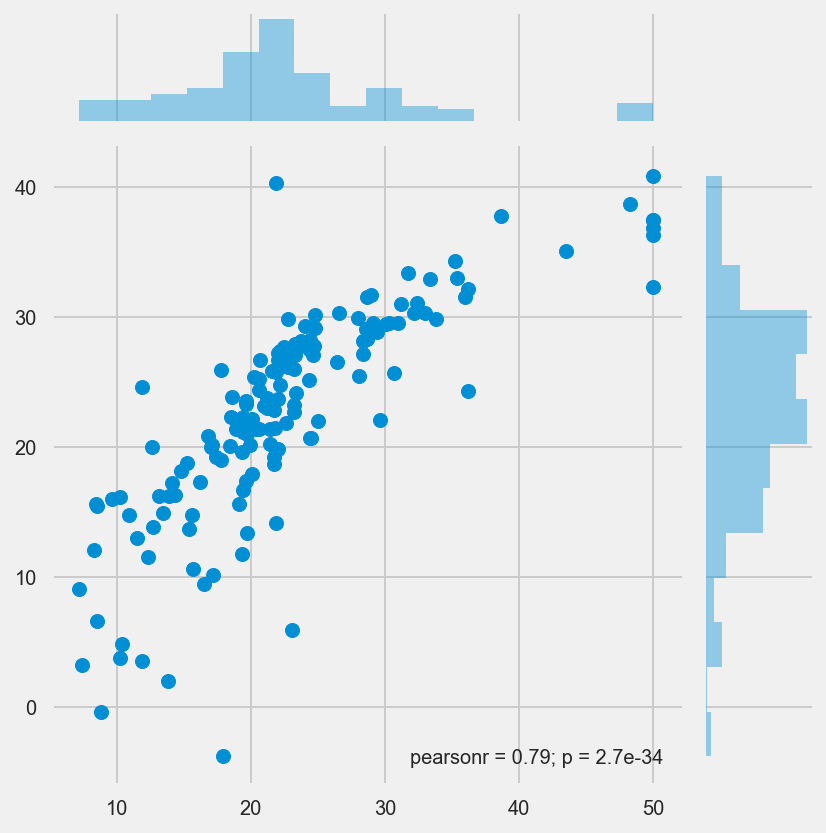

In [34]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [40]:
# A:
from sklearn.cross_validation import train_test_split

labels = ['CRIM','RM','B','LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[labels], y, train_size=0.7, random_state=8)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.61618000609842993

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[labels], y, train_size=0.9, random_state=8)

from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

lr2.fit(X_train,y_train)

lr2.score(X_test, y_test)

0.58392447563809857

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [85]:
# A: 
# this is very useful! just copy this!!!!!!!


from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print '------------------------------------\n'
    print 'K:', folds
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[labels], y, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[labels], y, cv=folds)
    
    
    r2 = metrics.r2_score(y, predictions)
    print "Cross-Predicted R2:", r2


------------------------------------

K: 5
Cross-validated scores: [ 0.64631693  0.70482771  0.44121527  0.08620083 -0.50525881]
Mean CV R2: 0.274660385693
Std CV R2: 0.446027804377
Cross-Predicted R2: 0.517343172523
------------------------------------

K: 6
Cross-validated scores: [ 0.60617609  0.70748062  0.52005295  0.6187581  -0.31575052 -0.22205816]
Mean CV R2: 0.319109846991
Std CV R2: 0.420181823716
Cross-Predicted R2: 0.479865451485
------------------------------------

K: 7
Cross-validated scores: [ 0.6551403   0.59539945  0.53563504  0.49472098  0.24503727 -0.64989835
  0.11581191]
Mean CV R2: 0.284549513906
Std CV R2: 0.421630778862
Cross-Predicted R2: 0.431468483359
------------------------------------

K: 8
Cross-validated scores: [ 0.67247147  0.61771501  0.68493632  0.61008211  0.58758257 -0.28401756
 -1.07692607  0.03328161]
Mean CV R2: 0.230640682757
Std CV R2: 0.595437166493
Cross-Predicted R2: 0.58058433287
------------------------------------

K: 9
Cross-validated 

In [66]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for i in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], pd.Series(y).iloc[train_index])
    mse_values.append(metrics.mean_squared_error(pd.Series(y).iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 21.565456707
R2: 0.739282616363
Model 2
MSE: 21.565456707
R2: 0.739282616363
Model 3
MSE: 21.565456707
R2: 0.739282616363
Model 4
MSE: 21.565456707
R2: 0.739282616363
Model 5
MSE: 21.565456707
R2: 0.739282616363
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 21.565456707
Mean of R2 for all folds: 0.739282616363


In [87]:
# here is the basic model 

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

print '--------------THIS IS THE K-FOLD----------------------\n'
K = 5
print 'K:', K
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X[labels], y, cv=K)
print "Cross-validated scores:", scores
print "Mean CV R2:", np.mean(scores)
print 'Std CV R2:', np.std(scores)

# Make cross-validated predictions
predictions = cross_val_predict(model, X[labels], y, cv=K)
print 'Crodd-validated predictions', predictions
r2 = metrics.r2_score(y, predictions)
print "Cross-Predicted R2:", r2

--------------THIS IS THE K-FOLD----------------------

K: 5
Cross-validated scores: [ 0.64631693  0.70482771  0.44121527  0.08620083 -0.50525881]
Mean CV R2: 0.274660385693
Std CV R2: 0.446027804377
Crodd-validated predictions [ 29.59640755  26.39060907  33.10583026  32.84772617  32.19406453
  28.71778646  22.42775786  19.26826268  10.15425693  19.53973896
  19.45708515  21.93018702  19.83921399  24.54323354  23.90863667
  23.84162346  25.32308659  20.85279676  18.94731819  21.60542206
  14.90902439  21.28021325  19.28794924  16.98421622  19.65252785
  16.96297087  19.80564791  18.7318275   24.44630662  25.70792519
  14.51724135  22.0633393   11.30216173  16.94277906  16.50460903
  23.67379677  21.99652599  23.80049134  23.52549497  30.0678522
  33.55069897  30.50496221  26.96046422  26.32357261  24.33388426
  22.12099594  20.31178481  18.72621839   8.60269445  18.19950411
  21.58647781  24.68515586  29.10188427  24.72966088  20.4439403
  32.99504154  28.1876611   31.34284645  26.3011

In [91]:
one_prediction = cross_val_predict(model, X[labels], y, cv=K)

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [100]:
X[labels][1:2]
test = [[0.022,5.21,300.0,5]]

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [50]:
# A:
from itertools import combinations
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [51]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print i
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [73]:
import patsy

df = X.copy()

# Add response to core DataFrame
df['MEDV'] = y

In [74]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("LSTAT ~ AGE + RM + MEDV", data=df, return_type="dataframe")

# "unravel" y
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [76]:
from sklearn import linear_model
# Build a new model and calculate the score:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print "R^2 Score: ", metrics.r2_score(y_test, predictions)

R^2 Score:  0.66327514181
